### Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline
plotsize = (16, 8)
sns.set_style('darkgrid')

## Explorando o DataFrame

### Dados adquiridos no site da EIA - U.S. Energy Information Administration
[Europe Brent Spot Price FOB](https://www.eia.gov/dnav/pet/hist/rbrteD.htm)

In [2]:
# importando o dataframe
dados = pd.read_excel("RBRTEd.xls", sheet_name="Data 1", skiprows=2)

In [3]:
dados.head()

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.6300
1,1987-05-21,18.4500
2,1987-05-22,18.5500
3,1987-05-25,18.6000
4,1987-05-26,18.6300


In [4]:
dados.shape

(9375, 2)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9375 entries, 0 to 9374
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              9375 non-null   datetime64[ns]
 1   Europe Brent Spot Price FOB (Dollars per Barrel)  9375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.6 KB


In [6]:
dados.isna().sum() #não há dados nulos na base

Date                                                0
Europe Brent Spot Price FOB (Dollars per Barrel)    0
dtype: int64

In [7]:
dados = dados.rename(columns={'Date': 'date',
                        'Europe Brent Spot Price FOB (Dollars per Barrel)': 'dollars_per_barrel'})
dados.head()

,date,dollars_per_barrel
0,1987-05-20,18.6300
1,1987-05-21,18.4500
2,1987-05-22,18.5500
3,1987-05-25,18.6000
4,1987-05-26,18.6300


### Ajustando o Datetime

In [8]:
dados.set_index('date', inplace=True)

In [9]:
dados.index.min()

Timestamp('1987-05-20 00:00:00')

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9375 entries, 1987-05-20 to 2024-04-29
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dollars_per_barrel  9375 non-null   float64
dtypes: float64(1)
memory usage: 146.5 KB


In [11]:
dados.index

DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-25',
               '1987-05-26', '1987-05-27', '1987-05-28', '1987-05-29',
               '1987-06-01', '1987-06-02',
               ...
               '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
               '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
               '2024-04-26', '2024-04-29'],
              dtype='datetime64[ns]', name='date', length=9375, freq=None)

**O índice não tem uma frequência definida** - freq=None

Isso acontece porque o dataset só tem registros de segunda a sexta, o ideal seria ter todos os dias dessa série no dataset para que a frequência seja de 7

In [12]:
data_range = dados.index.max() - dados.index.min()

print(f'Quantidade de dias no dataset: {len(dados.index.unique())}')
print(f'Total de dias da primeira entrada até agora: {data_range.days}')
print(f'O barril só é comercializado de segunda a sexta, portanto\
 temos {data_range.days - len(dados.index.unique())} dias sem registros durante toda a série.')

Quantidade de dias no dataset: 9375
Total de dias da primeira entrada até agora: 13494
O barril só é comercializado de segunda a sexta, portanto temos 4119 dias sem registros durante toda a série.


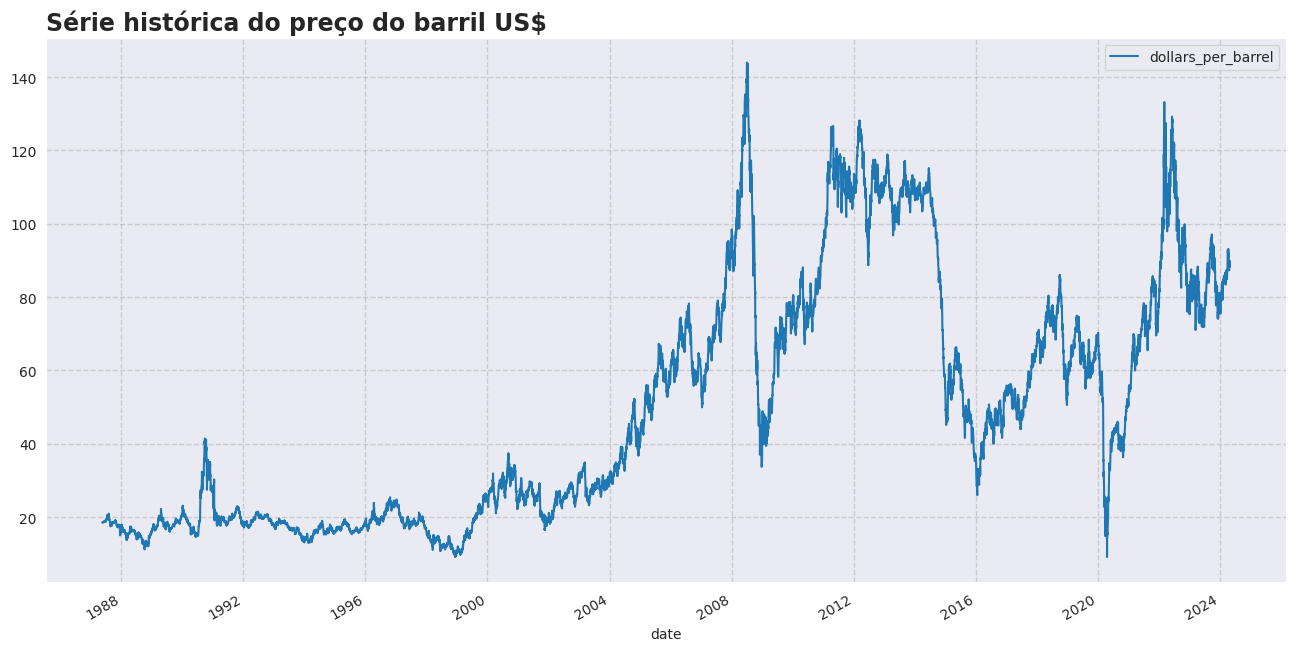

In [13]:
dados.plot(figsize=(16,8))
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.title('Série histórica do preço do barril US$', loc='left', fontsize=17, weight='bold')
plt.show()

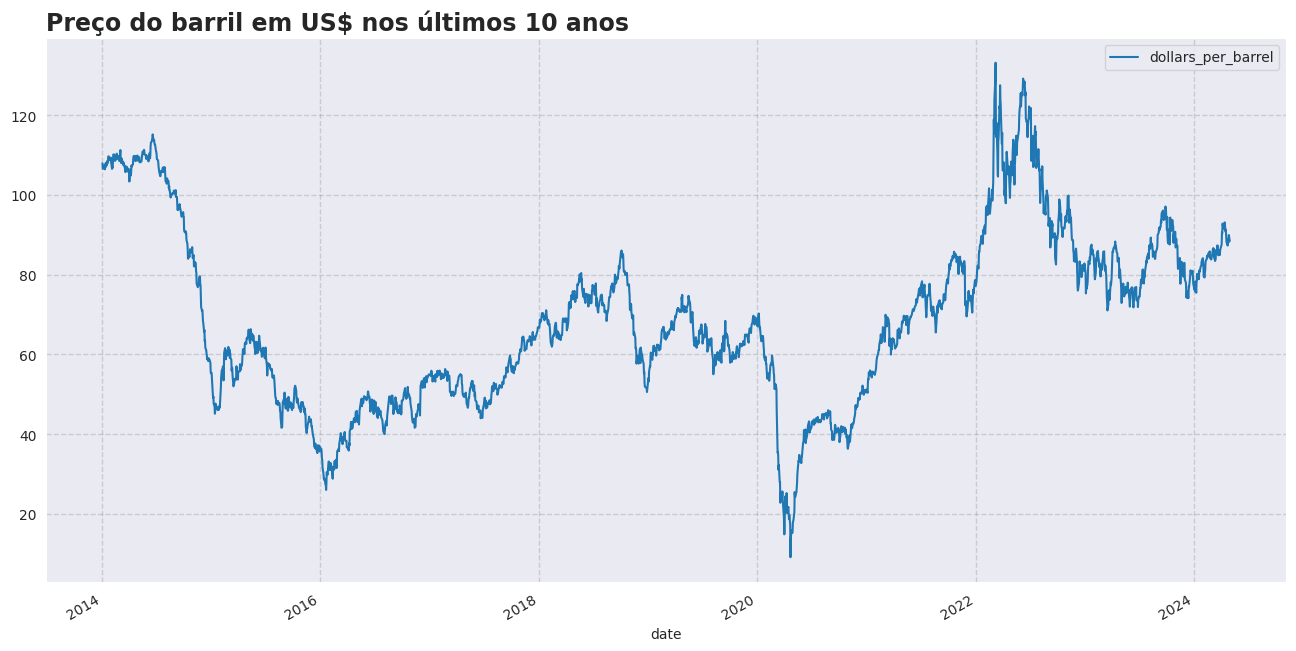

In [14]:
ultimos_10 = dados[dados.index.year.isin([2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024])]

ultimos_10.plot(figsize=(16,8))
plt.title('Preço do barril em US$ nos últimos 10 anos', loc='left', fontsize=17, weight='bold')
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.show()

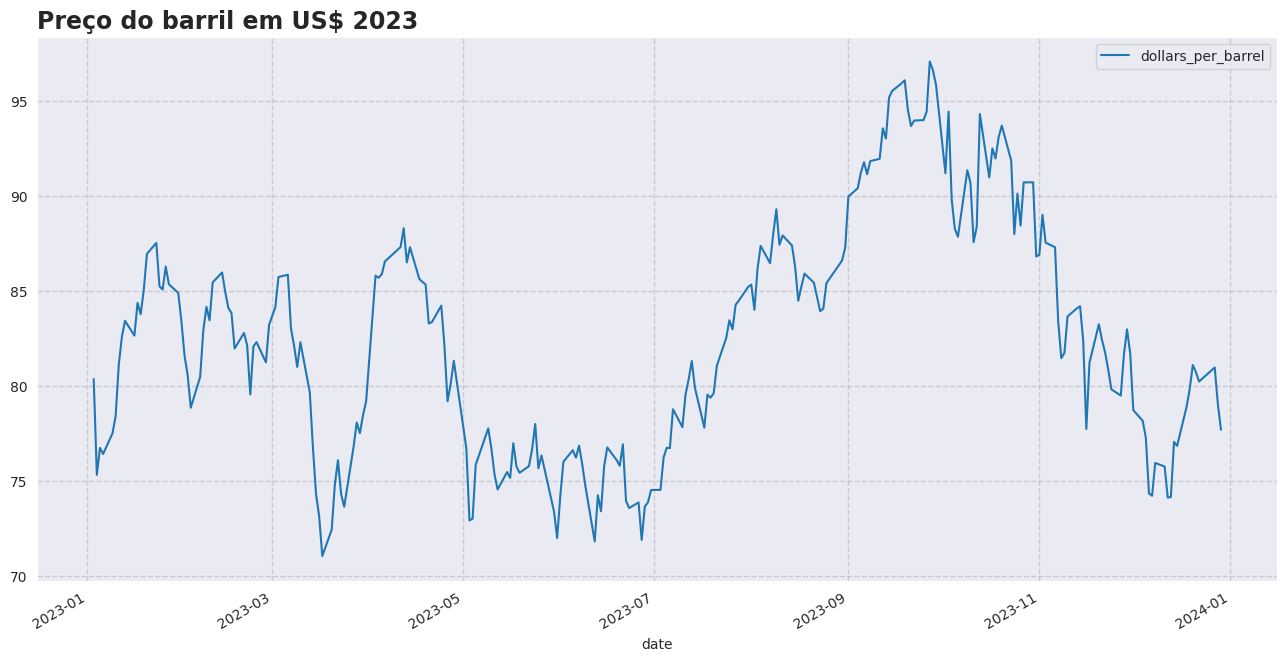

In [15]:
dados_23 = dados[dados.index.year.isin([2023])]

dados_23.plot(figsize=(16,8))
plt.title('Preço do barril em US$ 2023', loc='left', fontsize=17, weight='bold')
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.show()

## Diff

In [16]:
# criando uma cópia do df
df = dados.copy()

In [17]:
df['aumento'] = df['dollars_per_barrel'].diff()
df.head(10)

,dollars_per_barrel,aumento
date,,
1987-05-20,18.6300,NaN
1987-05-21,18.4500,-0.1800
1987-05-22,18.5500,0.1000
1987-05-25,18.6000,0.0500
1987-05-26,18.6300,0.0300
1987-05-27,18.6000,-0.0300
1987-05-28,18.6000,0.0000
1987-05-29,18.5800,-0.0200
1987-06-01,18.6500,0.0700


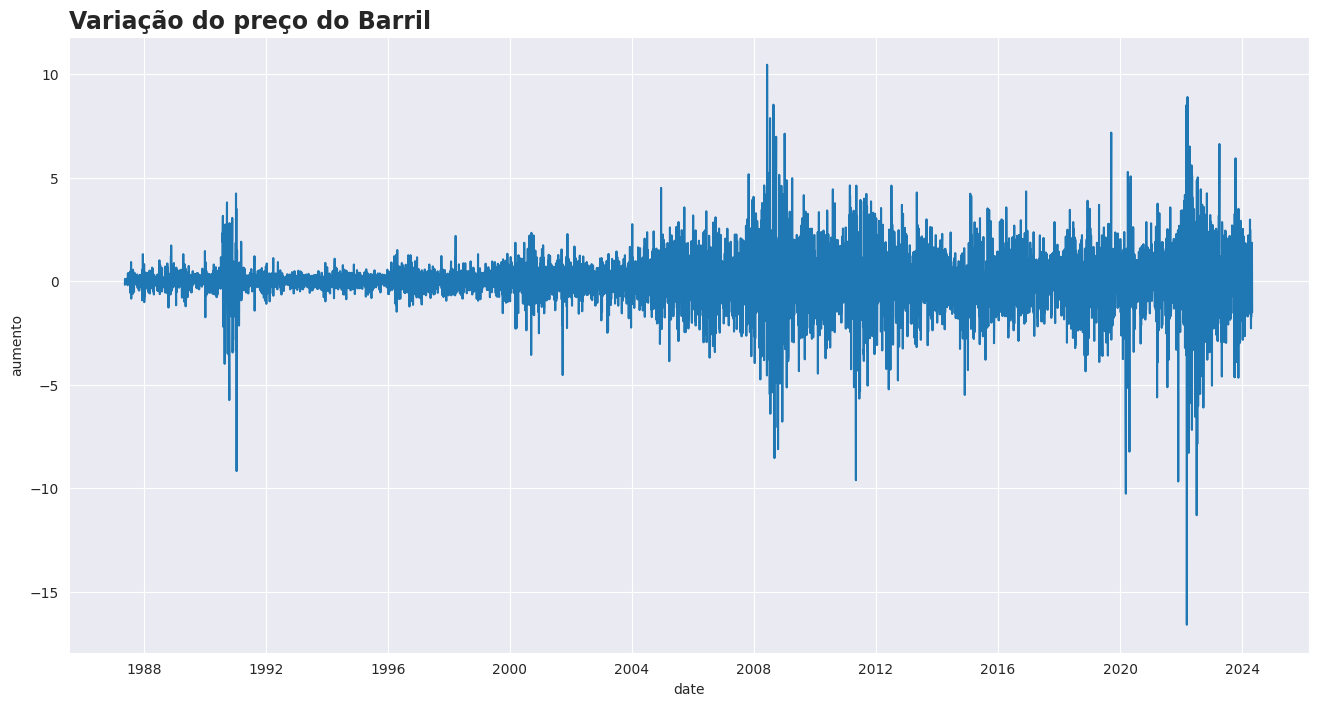

In [18]:
ax = sns.lineplot(x='date', y='aumento', data=df)
ax.figure.set_size_inches(16,8)
plt.title('Variação do preço do Barril', loc='left', fontsize=17, weight='bold')
ax=ax

## Média Movel e Janelas

In [19]:
tam_janela = 5 #nossa série tem períodos de 5 dias por semana

janela = dados.rolling(tam_janela).mean()
janela.head(10)

,dollars_per_barrel
date,
1987-05-20,NaN
1987-05-21,NaN
1987-05-22,NaN
1987-05-25,NaN
1987-05-26,18.5720
1987-05-27,18.5660
1987-05-28,18.5960
1987-05-29,18.6020
1987-06-01,18.6120


In [20]:
janela = dados.rolling(tam_janela)
print(janela.mean().dropna().head(5))

            dollars_per_barrel
date                          
1987-05-26             18.5720
1987-05-27             18.5660
1987-05-28             18.5960
1987-05-29             18.6020
1987-06-01             18.6120


Text(0.0, 1.0, 'Média Móvel')

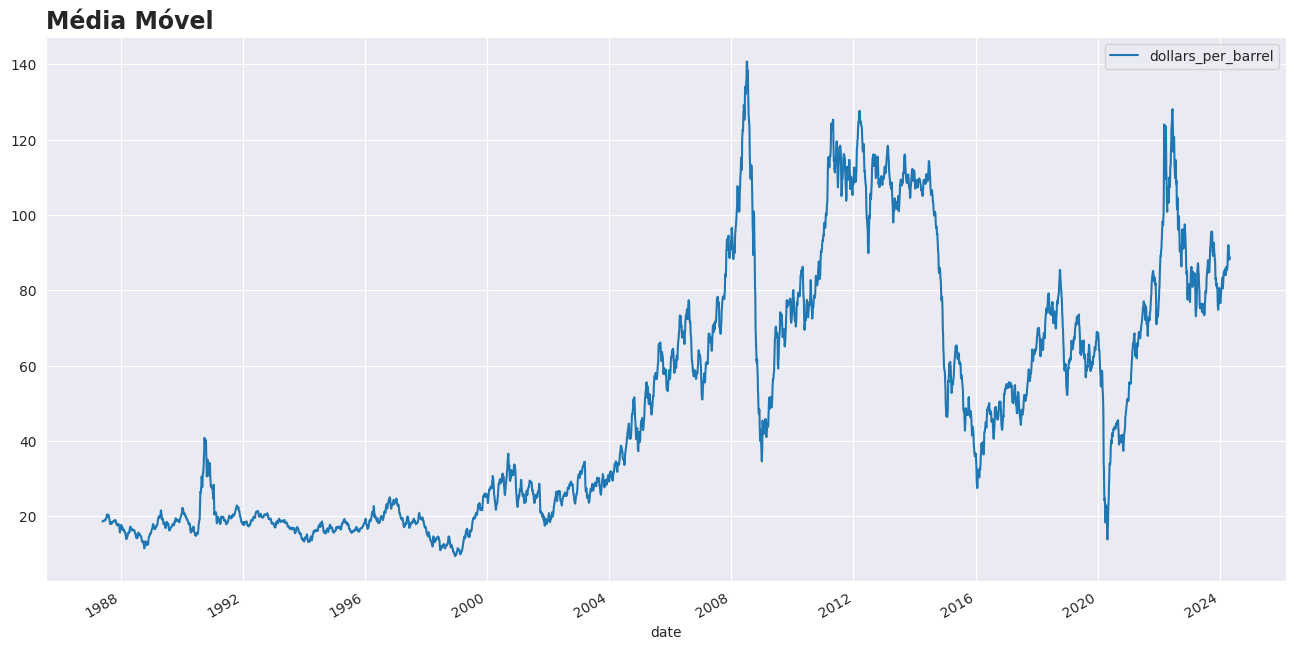

In [21]:
janela.mean().dropna().plot(figsize=(16,8))
plt.title('Média Móvel', loc='left', fontsize=17, weight='bold')

Text(0.0, 1.0, 'Desvio Padrão')

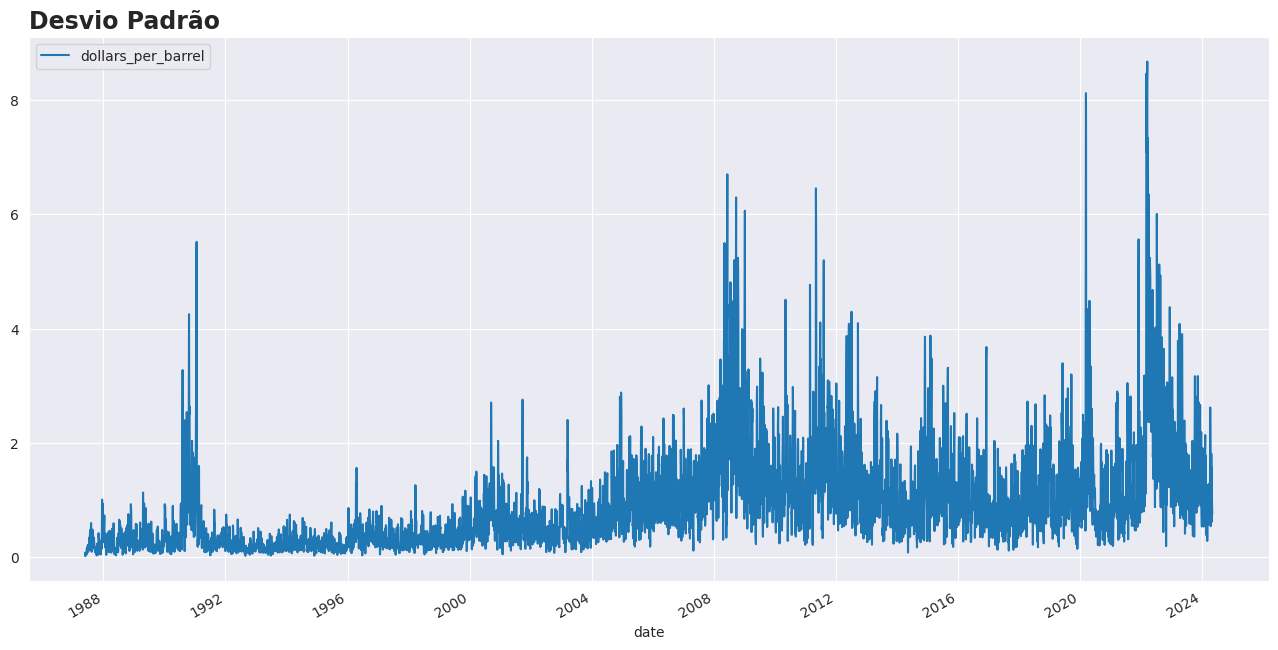

In [22]:
janela.std().dropna().plot(figsize=(16,8))
plt.title('Desvio Padrão', loc='left', fontsize=17, weight='bold')

## Upsampling

In [23]:
preco_semanal = dados.resample('W').sum()
preco_semanal.head()

,dollars_per_barrel
date,
1987-05-24,55.6300
1987-05-31,93.0100
1987-06-07,93.5100
1987-06-14,93.7700
1987-06-21,76.0300


In [24]:
preco_mensal = dados.resample('M').sum()
preco_mensal.head()

,dollars_per_barrel
date,
1987-05-31,148.6400
1987-06-30,396.0700
1987-07-31,456.7000
1987-08-31,398.5700
1987-09-30,402.8900


In [25]:
preco_trimestral = dados.resample('Q').sum()
preco_trimestral.head()

,dollars_per_barrel
date,
1987-06-30,544.7100
1987-09-30,"1,258.1600"
1987-12-31,"1,161.2600"
1988-03-31,970.6300
1988-06-30,"1,016.1800"


In [26]:
preco_anual = dados.resample('Y').sum()
preco_anual.head()

,dollars_per_barrel
date,
1987-12-31,"2,964.1300"
1988-12-31,"3,800.8800"
1989-12-31,"4,629.9700"
1990-12-31,"6,082.9300"
1991-12-31,"5,150.5700"


<Axes: title={'center': 'Cumulativo do preço semanal'}, xlabel='date'>

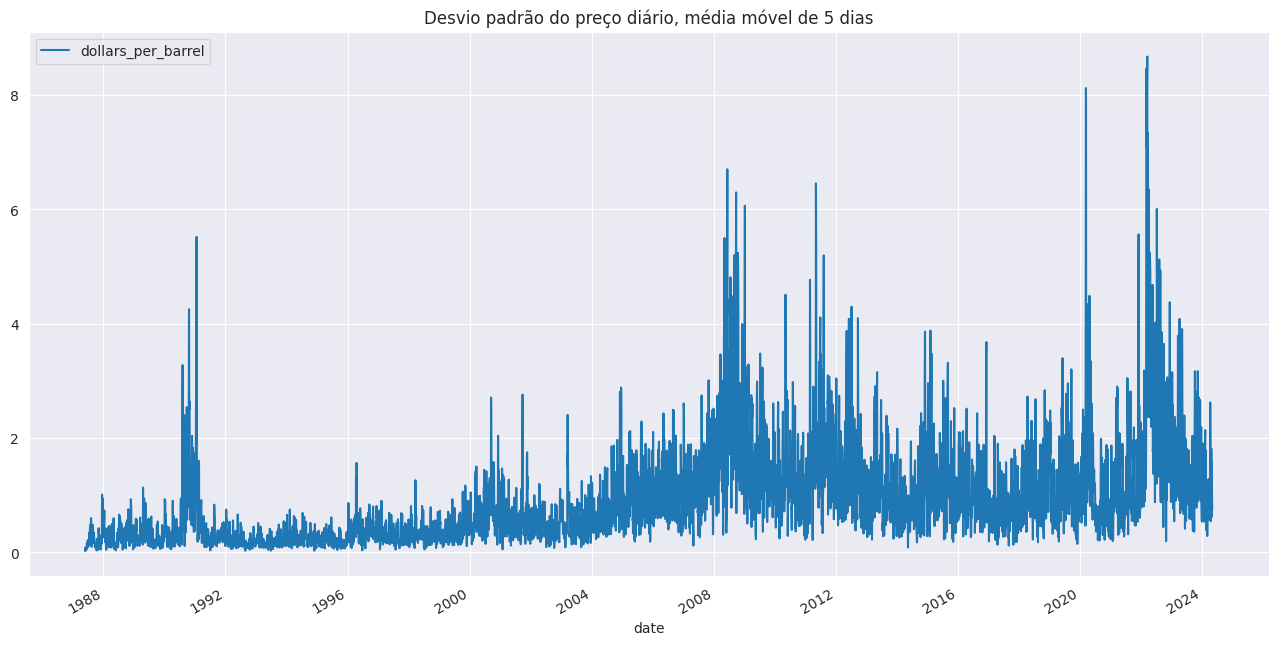

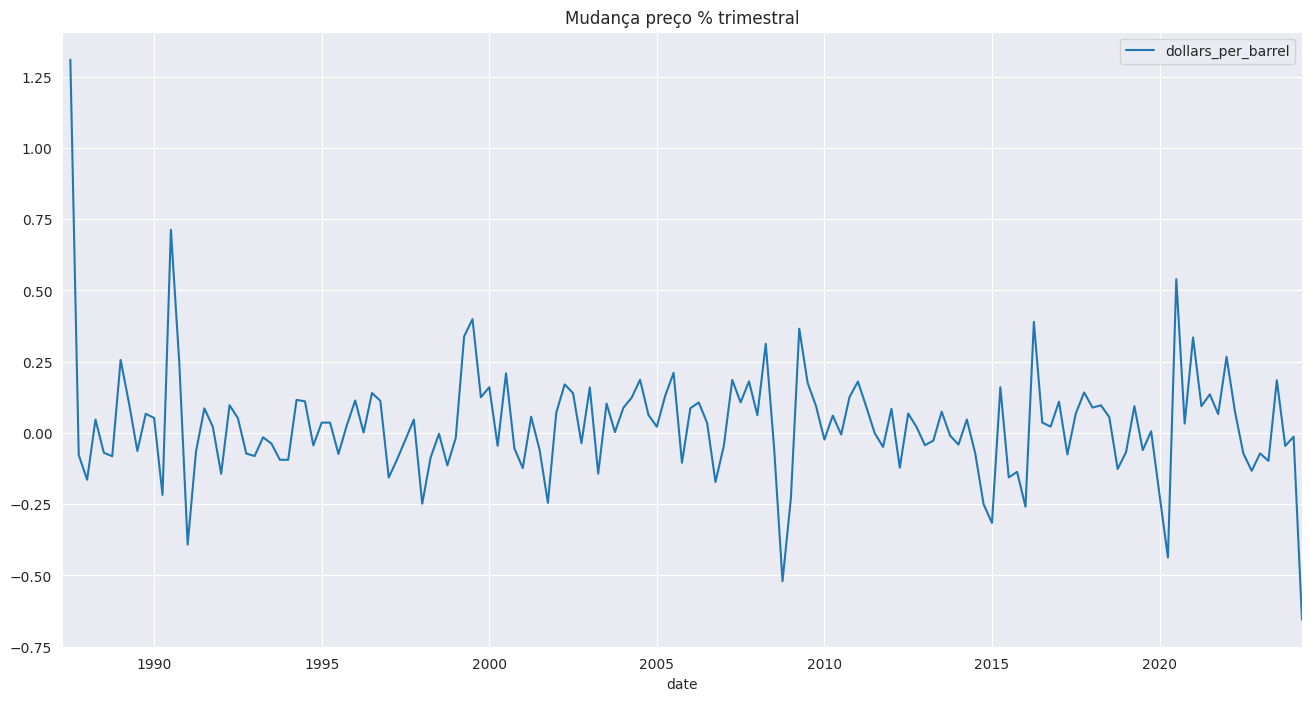

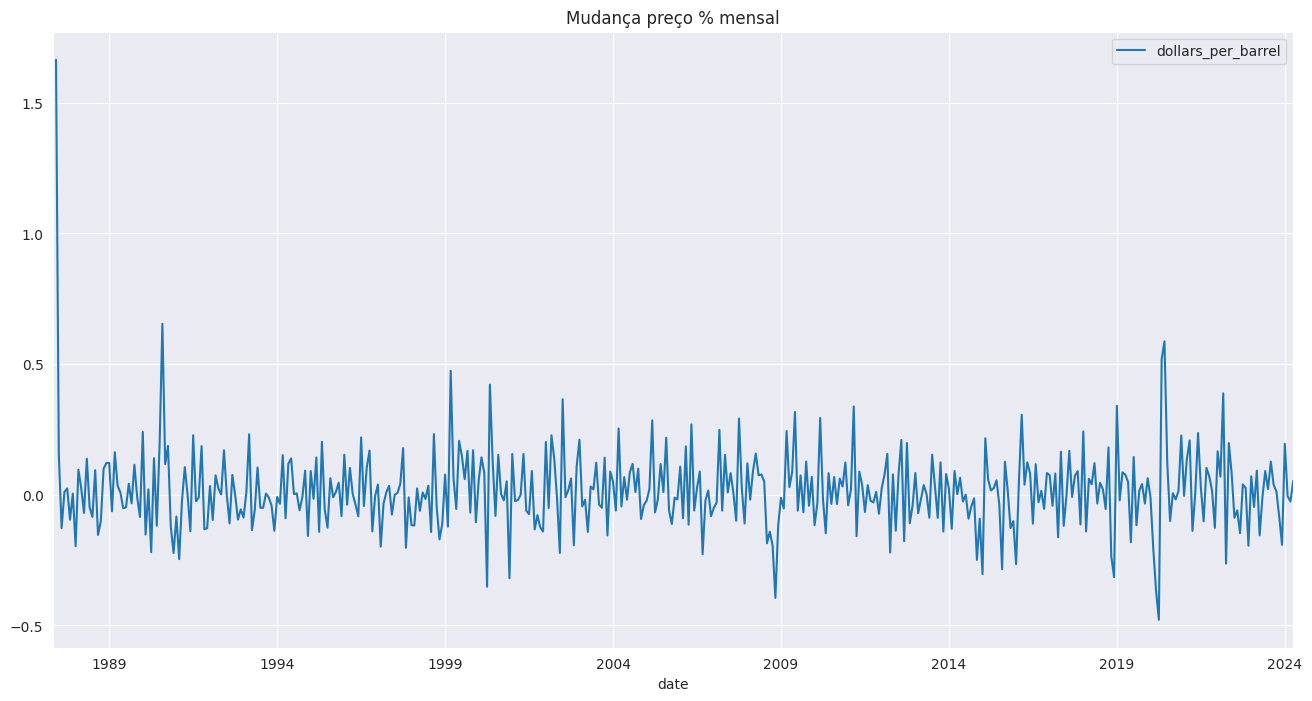

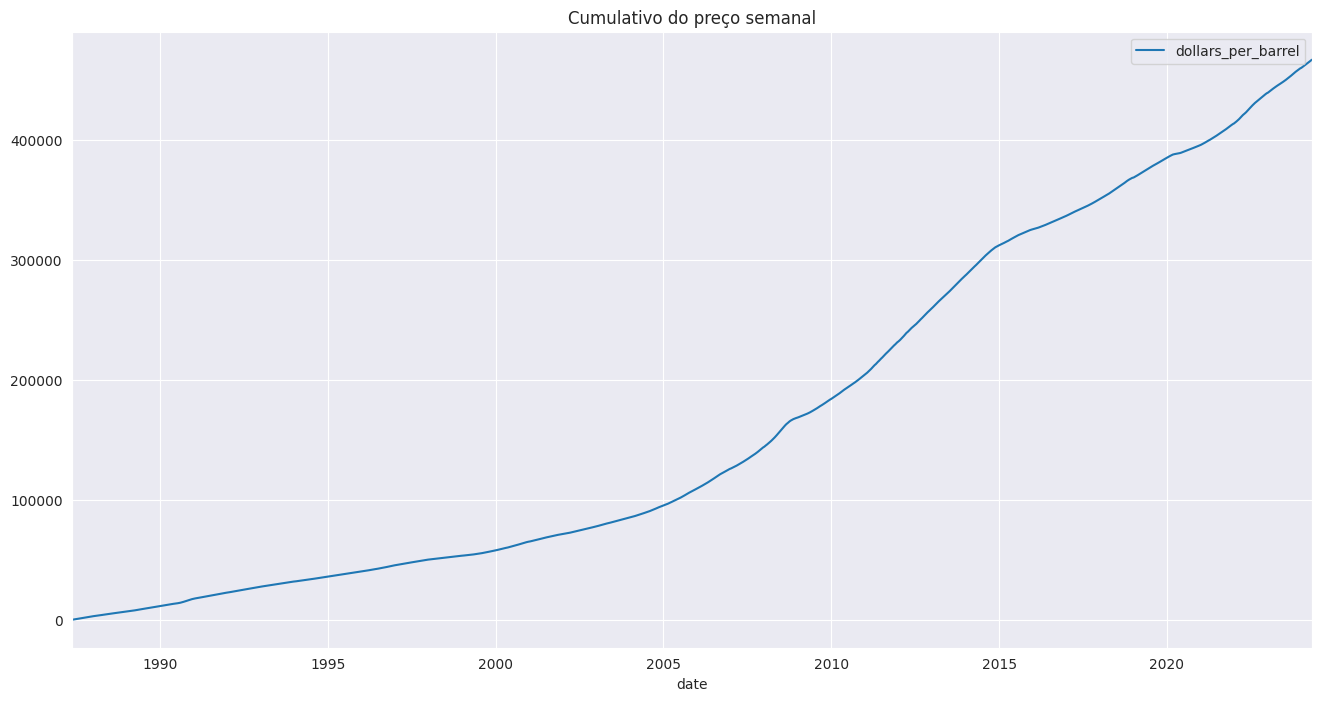

In [27]:
janela.std().plot(figsize=plotsize, title='Desvio padrão do preço diário, média móvel de 5 dias')
preco_trimestral.pct_change().plot(figsize=plotsize, title='Mudança preço % trimestral')
preco_mensal.pct_change().plot(figsize=plotsize, title='Mudança preço % mensal')
preco_semanal.cumsum().plot(figsize=plotsize, title='Cumulativo do preço semanal')

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

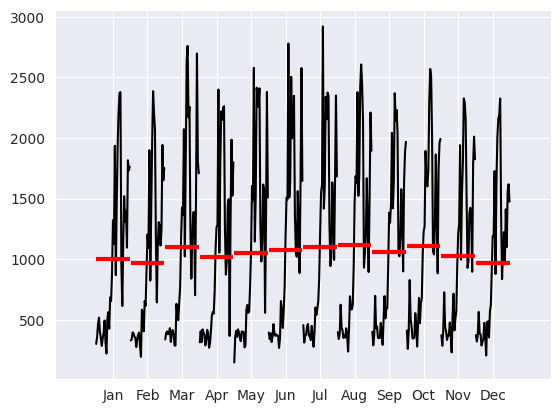

In [29]:
plot_mensal = month_plot(preco_mensal)


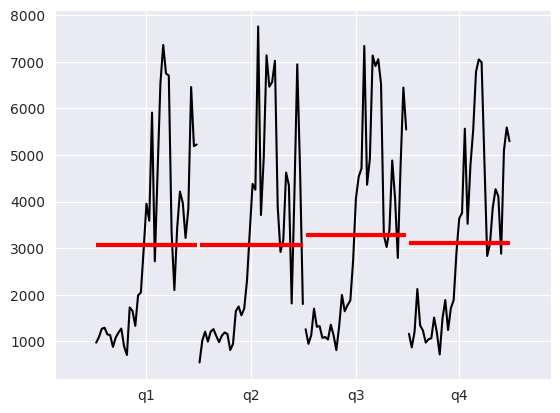

In [30]:
plot_trimestral = quarter_plot(preco_trimestral)

## Decompondo a série

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
ss_decomposition = seasonal_decompose(dados, model='additive', period=261)

tendencia_estimada = ss_decomposition.trend
sazonalidade_estimada = ss_decomposition.seasonal
residuo_estimado = ss_decomposition.resid

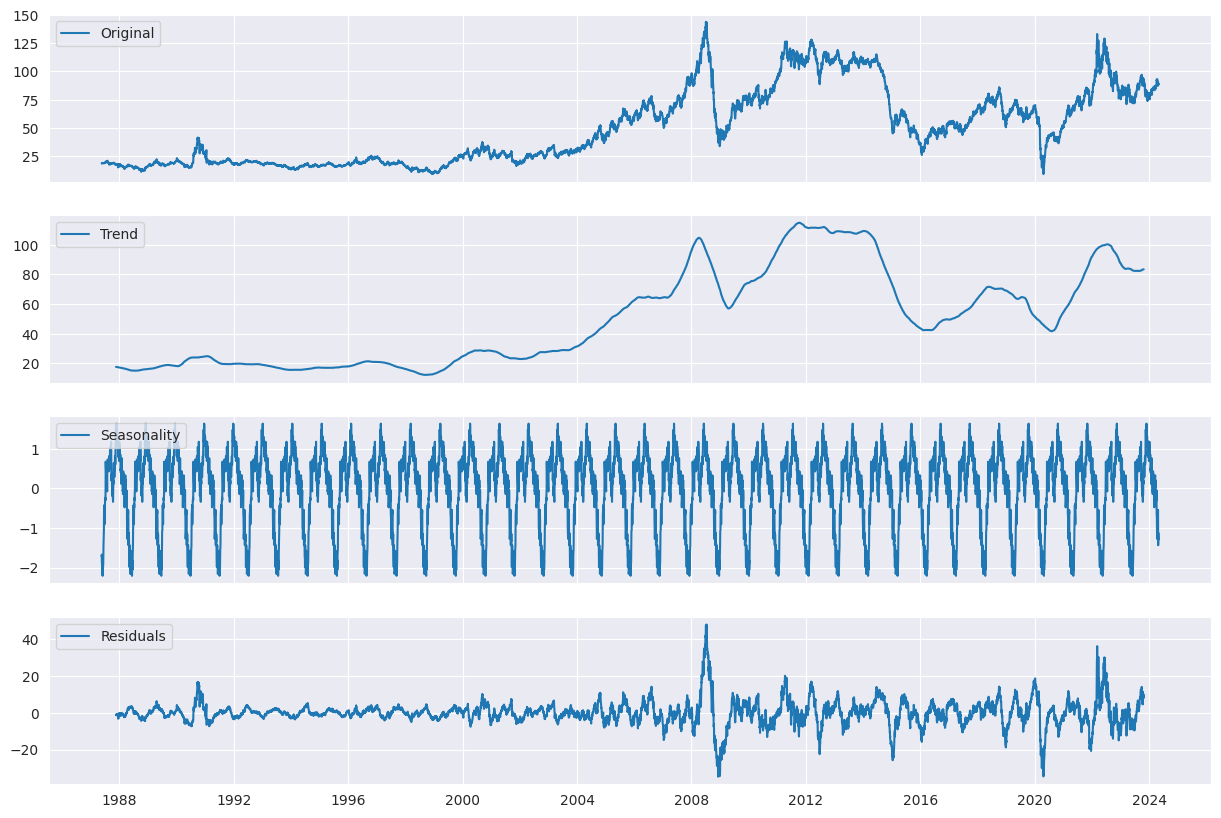

In [33]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dados, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(tendencia_estimada, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(sazonalidade_estimada, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residuo_estimado, label='Residuals')
axes[3].legend(loc='upper left');

In [34]:
ss_decomposition = seasonal_decompose(dados, model='multiplicative', period=261)

tendencia_estimada = ss_decomposition.trend
sazonalidade_estimada = ss_decomposition.seasonal
residuo_estimado = ss_decomposition.resid

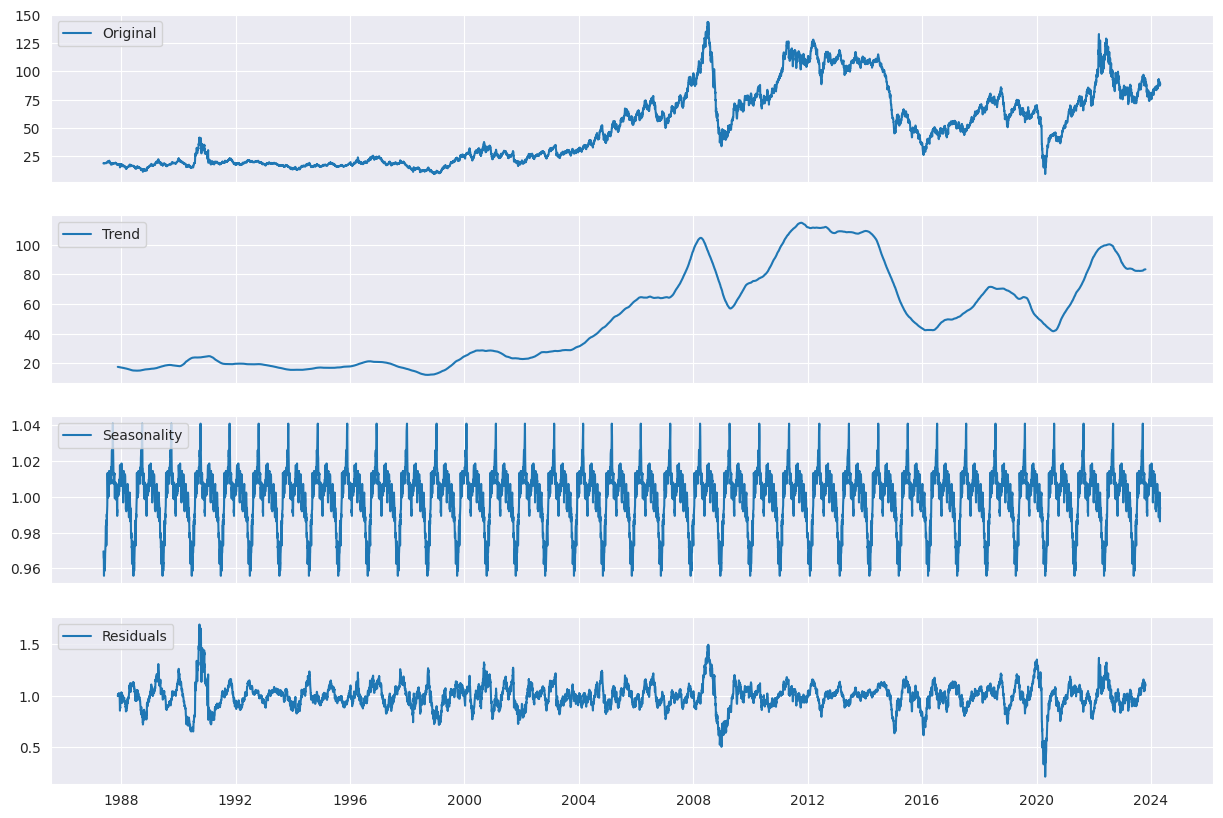

In [35]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dados, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(tendencia_estimada, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(sazonalidade_estimada, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residuo_estimado, label='Residuals')
axes[3].legend(loc='upper left');

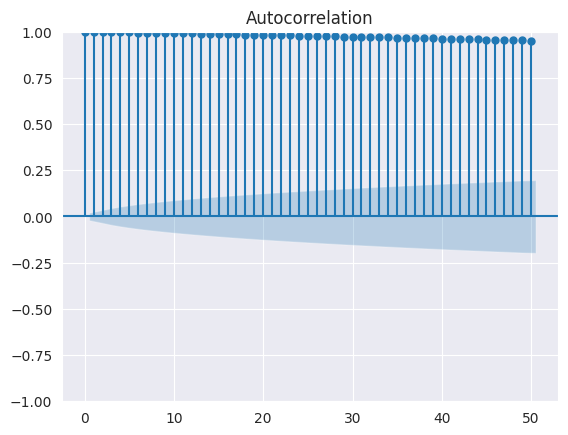

In [36]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(dados, lags=50)
plt.show()

## Estacionaridade e autocorrelação

Para que uma Time Series seja estacionaria os dados devem exibir quatro caracteristicas ao longo do tempo:
- média constante
- variancia constante
- estrutura de autocorrelação constante
- sem componentes periódicos (sazonalidade)

### Augmented Dickey-Fuller Test

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(dados['dollars_per_barrel'])

#### Como interpretar os resultados do teste ADF?
Os resultados do teste ADF fornecerão uma estatística de teste e um valor p. A estatística do teste é comparada com os valores críticos em diferentes níveis de significância, geralmente 1%, 5% e 10%. Se a estatística de teste for mais negativa do que o valor crítico, você poderá rejeitar a hipótese nula e concluir que a série temporal está estacionária. Se a estatística de teste for menos negativa que o valor crítico, você não poderá rejeitar a hipótese nula e concluir que a série temporal tem uma raiz unitária. O valor de p é a probabilidade de se obter uma estatística de teste tão extrema ou mais extrema do que a observada sob a hipótese nula. Se o valor de p for menor que o nível de significância, você poderá rejeitar a hipótese nula e concluir que a série temporal está estacionária. Se o valor de p for maior que o nível de significância, você não poderá rejeitar a hipótese nula e concluir que a série temporal tem uma raiz unitária.

In [39]:
print('>> ADF TEST RESULTS')
print(f'estatística de teste: {adf}')
print(f'p-value: {pvalue}')
print('critical values:')
resultado_adf = adfuller(dados['dollars_per_barrel'])
for key, value in resultado_adf[4].items():
    print(f'   {key}: {value}')

>> ADF TEST RESULTS
estatística de teste: -2.099761188856605
p-value: 0.24461063950613626
critical values:
   1%: -3.431049956892912
   5%: -2.8618493369218845
   10%: -2.5669346549586463


- A série não é estacionária

## Transformando a série em estacionária

#### teste 1 - subtrair dados logaritmicos pela ma

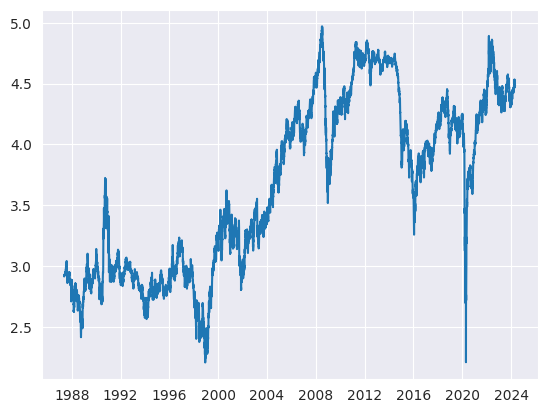

In [40]:
dados_log = np.log(dados)
plt.plot(dados_log)

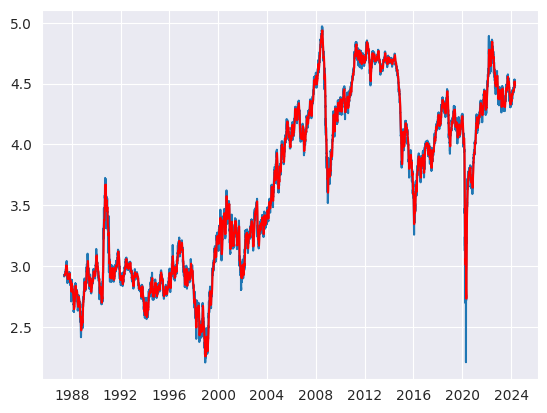

In [41]:
# calculando a média móvel
movingavg = dados_log.rolling(window=10).mean()
movingSTD = dados_log.rolling(window=10).std()
plt.plot(dados_log)
plt.plot(movingavg, color='red')

In [42]:
dados_log_menos_ma = dados_log - movingavg
dados_log_menos_ma.dropna(inplace = True)
dados_log_menos_ma.head(15)

,dollars_per_barrel
date,
1987-06-02,0.0045
1987-06-03,0.0076
1987-06-04,0.0074
1987-06-05,-0.0001
1987-06-08,0.0044
1987-06-09,0.0052
1987-06-10,0.0043
1987-06-11,-0.0015
1987-06-12,0.0028


In [43]:
def test_stationarity(timeseries):

    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(timeseries['dollars_per_barrel'])

    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #plot
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #adf:
    print('>> ADF TEST RESULTS')
    print(f'estatística de teste: {adf}')
    print(f'p-value: {pvalue}')
    print(f'# lags usados: {usedlag}')
    print('critical values:')
    resultado_adf = adfuller(dados['dollars_per_barrel'])
    for key, value in resultado_adf[4].items():
        print(f'   {key}: {value}')

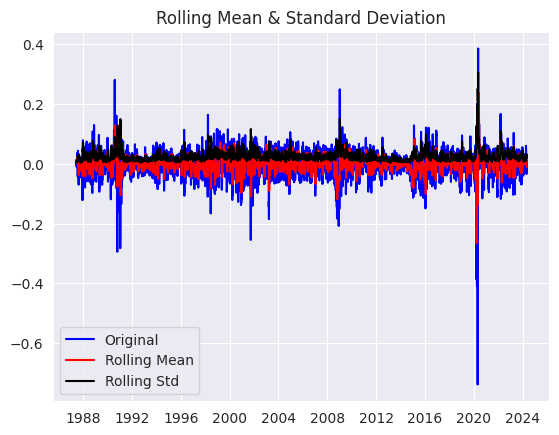

>> ADF TEST RESULTS
estatística de teste: -16.07626364687002
p-value: 5.439009307896431e-29
# lags usados: 29
critical values:
   1%: -3.431049956892912
   5%: -2.8618493369218845
   10%: -2.5669346549586463


In [44]:
test_stationarity(dados_log_menos_ma)

#### teste 2: decaimento exponencial

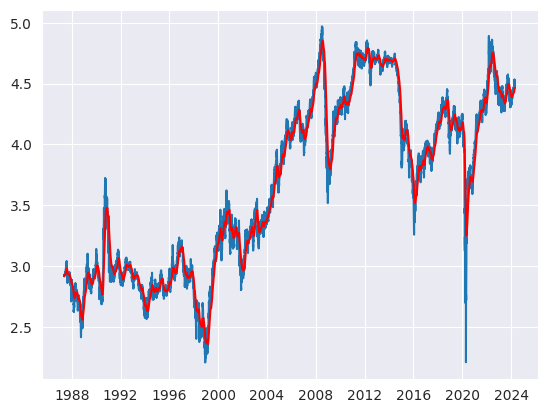

In [45]:
dados_media_exp = dados_log.ewm(halflife=20, min_periods=0, adjust=True).mean()
plt.plot(dados_log)
plt.plot(dados_media_exp, color='red')

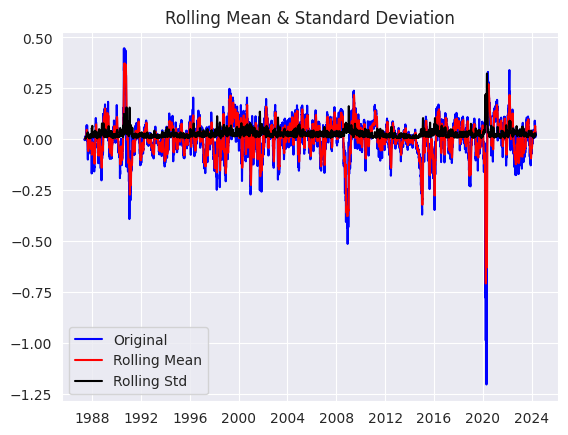

>> ADF TEST RESULTS
estatística de teste: -11.579880765842821
p-value: 2.9605468072011377e-21
# lags usados: 29
critical values:
   1%: -3.431049956892912
   5%: -2.8618493369218845
   10%: -2.5669346549586463


In [46]:
dados_log_menos_ma_exp = dados_log - dados_media_exp
test_stationarity(dados_log_menos_ma_exp)

#### teste 3: diferenciação

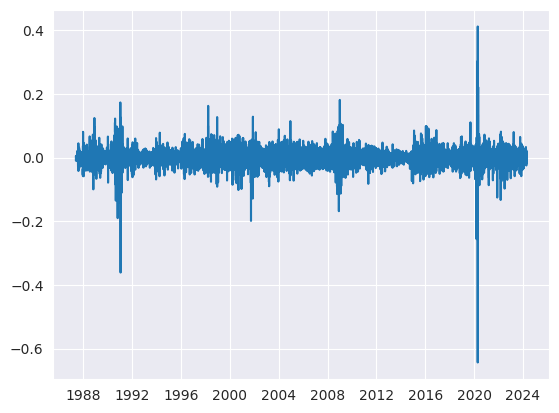

In [47]:
dados_log_diff = dados_log - dados_log.shift()
plt.plot(dados_log_diff)

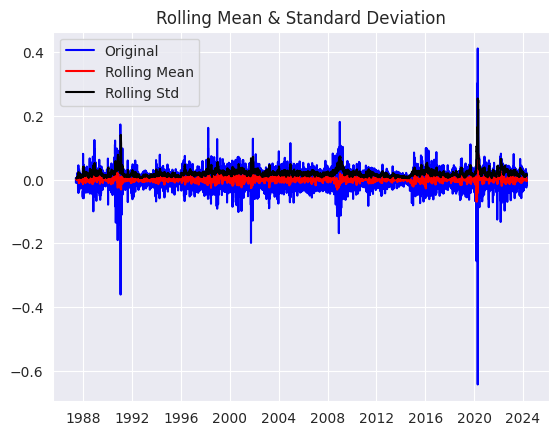

>> ADF TEST RESULTS
estatística de teste: -16.77720829911617
p-value: 1.2727998857055407e-29
# lags usados: 28
critical values:
   1%: -3.431049956892912
   5%: -2.8618493369218845
   10%: -2.5669346549586463


In [48]:
dados_log_diff.dropna(inplace=True)
test_stationarity(dados_log_diff)

## Teste de Correlação Parcial

In [49]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

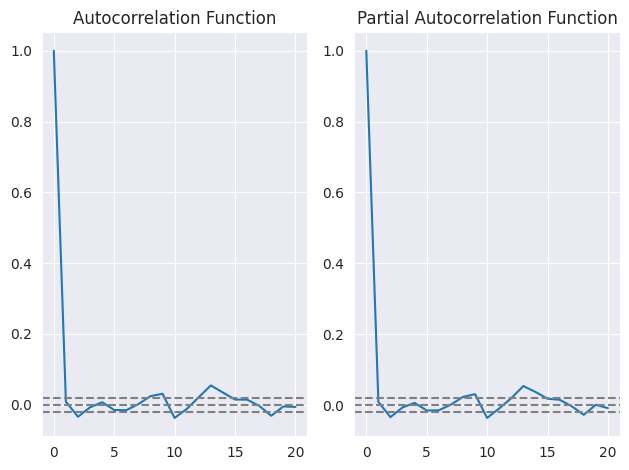

In [50]:
lag_acf = acf(dados_log_diff, nlags=20)
lag_pacf = pacf(dados_log_diff, nlags=20, method='ols')

#ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dados_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dados_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dados_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dados_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

## ARIMA

In [51]:
model = ARIMA(dados_log_diff, order=(2,1,2))
results_ar = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


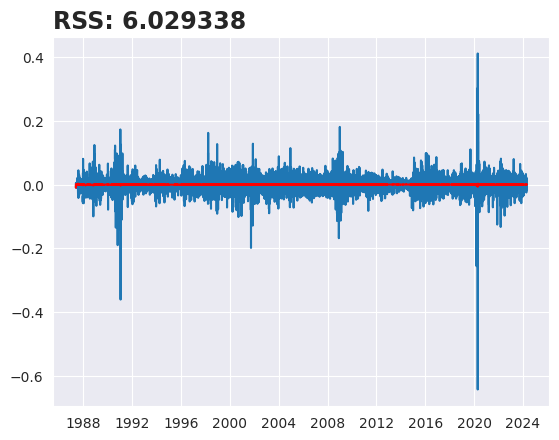

In [52]:
plt.plot(dados_log_diff)
plt.plot(results_ar.fittedvalues, color='red')
plt.title('RSS: %4f'%sum((results_ar.fittedvalues - dados_log_diff['dollars_per_barrel'])**2),
          loc='left', fontsize=17, weight='bold')
plt.show()

#### Validando com MAPE

In [53]:
from sklearn.metrics import mean_absolute_error

In [54]:
predictions = results_ar.fittedvalues
predictions.index = dados_log_diff.index

predicted_values = dados_log['dollars_per_barrel'].iloc[0] + np.cumsum(predictions)

#mape
mape = mean_absolute_error(dados_log_diff['dollars_per_barrel'], predicted_values) * 100
print(f'MAPE: {mape:.2f}%')

MAPE: 326.31%


## Prophet

In [55]:
from prophet import Prophet

In [56]:
dados_prophet = dados.copy()

In [57]:
dados_prophet.head()

,dollars_per_barrel
date,
1987-05-20,18.6300
1987-05-21,18.4500
1987-05-22,18.5500
1987-05-25,18.6000
1987-05-26,18.6300


In [58]:
dados_prophet = dados_prophet.reset_index('date')
dados_prophet[['ds', 'y']] = dados_prophet[['date', 'dollars_per_barrel']]
dados_prophet.drop(columns=['date', 'dollars_per_barrel'], inplace=True)
dados_prophet.head()

,ds,y
0,1987-05-20,18.6300
1,1987-05-21,18.4500
2,1987-05-22,18.5500
3,1987-05-25,18.6000
4,1987-05-26,18.6300


In [59]:
train_data = dados_prophet.sample(frac=0.8, random_state=0)
test_data = dados_prophet.drop(train_data.index)

print(f'Tamanho dos dados de treino: {train_data.shape}')
print(f'Tamanho dos dados de teste: {test_data.shape}')

Tamanho dos dados de treino: (7500, 2)
Tamanho dos dados de teste: (1875, 2)


In [60]:
model = Prophet(daily_seasonality=True)
model.fit(train_data)
future_data = model.make_future_dataframe(periods=20, freq='M')
previsao = model.predict(future_data)
previsao.head()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsul1oib/bmluuppz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsul1oib/7ysn18i2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12818', 'data', 'file=/tmp/tmpwsul1oib/bmluuppz.json', 'init=/tmp/tmpwsul1oib/7ysn18i2.json', 'output', 'file=/tmp/tmpwsul1oib/prophet_model2tbrhqyt/prophet_model-20240517204707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:47:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:47:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-05-21,17.5563,3.6199,31.0057,17.5563,17.5563,-0.4300,-0.4300,-0.4300,-1.6163,...,-0.0029,-0.0029,-0.0029,1.1892,1.1892,1.1892,0.0000,0.0000,0.0000,17.1263
1,1987-05-22,17.5600,3.2232,30.9650,17.5600,17.5600,-0.4710,-0.4710,-0.4710,-1.6163,...,-0.0466,-0.0466,-0.0466,1.1919,1.1919,1.1919,0.0000,0.0000,0.0000,17.0890
2,1987-05-25,17.5711,3.4562,31.0365,17.5711,17.5711,-0.3547,-0.3547,-0.3547,-1.6163,...,0.0749,0.0749,0.0749,1.1867,1.1867,1.1867,0.0000,0.0000,0.0000,17.2164
3,1987-05-26,17.5748,3.2382,30.3515,17.5748,17.5748,-0.7125,-0.7125,-0.7125,-1.6163,...,-0.2787,-0.2787,-0.2787,1.1825,1.1825,1.1825,0.0000,0.0000,0.0000,16.8623
4,1987-05-27,17.5785,3.1911,30.8319,17.5785,17.5785,-0.5890,-0.5890,-0.5890,-1.6163,...,-0.1508,-0.1508,-0.1508,1.1780,1.1780,1.1780,0.0000,0.0000,0.0000,16.9895


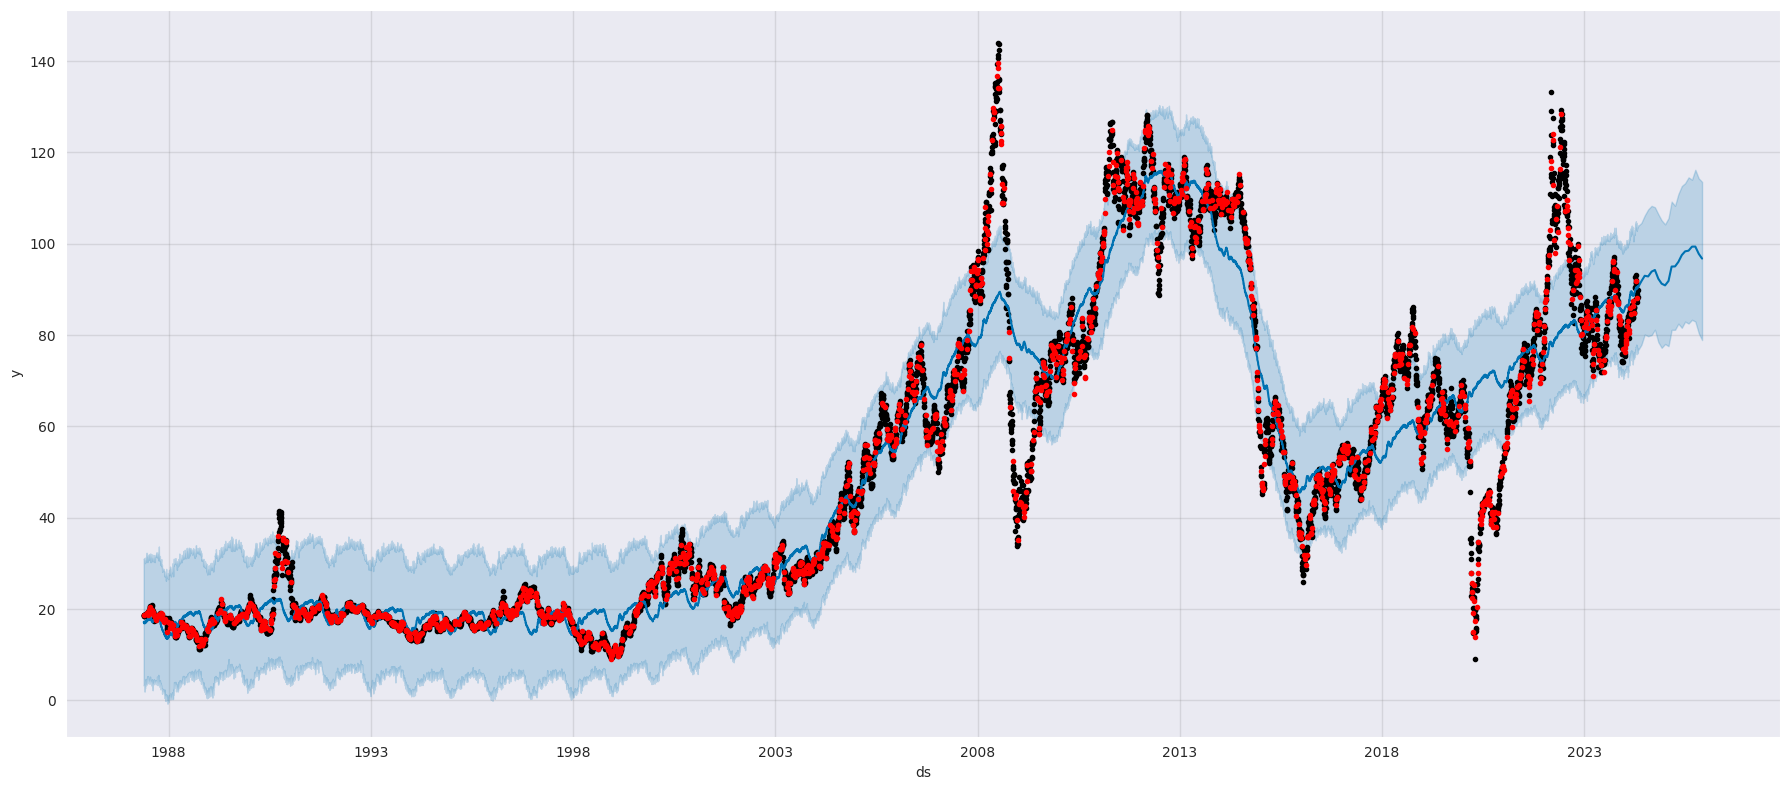

In [61]:
model.plot(previsao, figsize=(18,8));
plt.plot(test_data['ds'], test_data['y'], '.r')

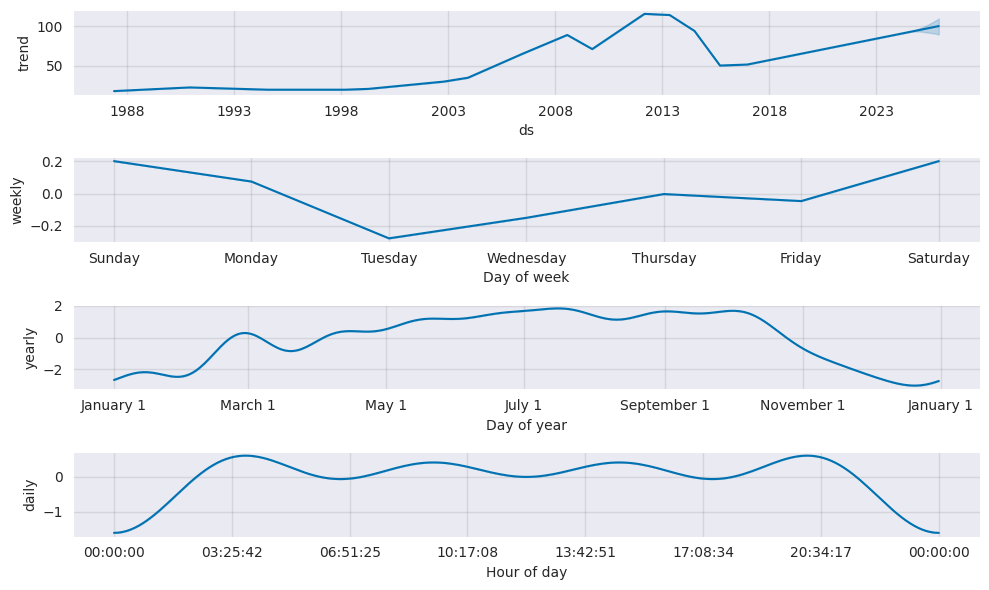

In [62]:
model.plot_components(previsao, figsize=(10,6));

In [63]:
# extraindo colunas mais relevantes
colunas_previsao = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

previsao = previsao[colunas_previsao]
valores_reais = train_data[valores_reais_cols]

#concatenando os resultados para comparação
resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) *100

mape = np.mean(resultados['erro_percentual_absoluto'])
print(f'mape: {mape:.2f}%')

mape: 16.03%


In [64]:
dados.shape

(9375, 1)

#### Validação Cruzada

In [65]:
from prophet.diagnostics import cross_validation

dados_cv = cross_validation(model, initial='9375 days', period='261 days', horizon='261 days')

INFO:prophet:Making 15 forecasts with cutoffs between 2013-08-10 00:00:00 and 2023-08-12 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsul1oib/e5wls_q1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsul1oib/dexyi8ys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83730', 'data', 'file=/tmp/tmpwsul1oib/e5wls_q1.json', 'init=/tmp/tmpwsul1oib/dexyi8ys.json', 'output', 'file=/tmp/tmpwsul1oib/prophet_model8842h2de/prophet_model-20240517204740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:47:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:47:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsul1oib/m6_sqe9l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsul1oib/q98uol9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [66]:
dados_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-08-13,114.0189,101.0774,126.9978,110.6900,2013-08-10
1,2013-08-15,114.6754,100.5463,127.8467,111.5800,2013-08-10
2,2013-08-16,114.5050,101.8631,127.8602,111.8200,2013-08-10
3,2013-08-19,114.6770,101.2825,127.7973,111.4100,2013-08-10
4,2013-08-22,115.1135,101.6360,127.9708,110.5100,2013-08-10


In [67]:
from prophet.diagnostics import performance_metrics
dados_performance = performance_metrics(dados_cv)
dados_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,27 days,814.6014,28.5412,21.9436,0.3451,0.3362,0.3335,0.4339
1,28 days,796.7696,28.2271,21.6407,0.3392,0.3308,0.3295,0.4444
2,29 days,789.0067,28.0893,21.5095,0.3369,0.3179,0.3275,0.4479
3,30 days,797.9771,28.2485,21.6219,0.3377,0.3217,0.3282,0.4481
4,31 days,803.7689,28.3508,21.7472,0.3384,0.3146,0.3290,0.4491
...,...,...,...,...,...,...,...,...
230,257 days,"1,528.7972",39.0998,31.8926,0.4963,0.4473,0.4833,0.3177
231,258 days,"1,498.4672",38.7100,31.4776,0.4907,0.4402,0.4789,0.3241
232,259 days,"1,500.1659",38.7320,31.4954,0.4920,0.4402,0.4799,0.3214
233,260 days,"1,554.1157",39.4223,31.9792,0.5002,0.4433,0.4861,0.3164


## LSTM

In [68]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.metrics import MeanSquaredError

In [69]:
dados_lstm = dados.copy()

In [70]:
dados_lstm = dados_lstm.reset_index()

In [71]:
dados_lstm.head()

,date,dollars_per_barrel
0,1987-05-20,18.6300
1,1987-05-21,18.4500
2,1987-05-22,18.5500
3,1987-05-25,18.6000
4,1987-05-26,18.6300


In [72]:
dados_preco = dados_lstm['dollars_per_barrel'].values
dados_preco = dados_preco.reshape(-1,1) #transformando em array

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
# normalizando
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(dados_preco)
dados_preco = scaler.transform(dados_preco)

In [75]:
# separacao dos dados
porcentagem = 0.80
split = int(porcentagem*len(dados_preco))

treino_preco = dados_preco[:split]
teste_preco = dados_preco[split:]

data_treino = dados_lstm['date'][:split]
data_teste = dados_lstm['date'][split:]

print(len(treino_preco))
print(len(teste_preco))

7500
1875


In [76]:
look_back = 5
train_generator = TimeseriesGenerator(treino_preco, treino_preco, length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(teste_preco, teste_preco, length=look_back, batch_size=1)

In [77]:
np.random.seed(7)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(look_back,1)))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss='mse', metrics=[MeanSquaredError()])

num_epochs=20
model.fit(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/20
375/375 [==============================] - 12s 12ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 2/20
375/375 [==============================] - 5s 14ms/step - loss: 1.8395e-04 - mean_squared_error: 1.8395e-04
Epoch 3/20
375/375 [==============================] - 4s 11ms/step - loss: 2.0506e-04 - mean_squared_error: 2.0506e-04
Epoch 4/20
375/375 [==============================] - 5s 13ms/step - loss: 2.4057e-04 - mean_squared_error: 2.4057e-04
Epoch 5/20
375/375 [==============================] - 5s 12ms/step - loss: 2.6743e-04 - mean_squared_error: 2.6743e-04
Epoch 6/20
375/375 [==============================] - 4s 11ms/step - loss: 2.3298e-04 - mean_squared_error: 2.3298e-04
Epoch 7/20
375/375 [==============================] - 5s 12ms/step - loss: 2.3912e-04 - mean_squared_error: 2.3912e-04
Epoch 8/20
375/375 [==============================] - 5s 13ms/step - loss: 1.8206e-04 - mean_squared_error: 1.8206e-04
Epoch 9/20
375/375 [==============================] - 4

In [78]:
mse = model.evaluate(test_generator, verbose=1)
print(f'Erro quadratico médio:{mse[0]}')

1870/1870 [==============================] - 14s 7ms/step - loss: 2.5194e-04 - mean_squared_error: 2.5194e-04
Erro quadratico médio:0.00025194103363901377


In [79]:
test_predictions = model.predict(test_generator)

test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(1,-1))
test_actual_inv = scaler.inverse_transform(np.array(teste_preco).reshape(-1,1))

test_actual_inv = test_actual_inv[:len(test_predictions_inv)]

1870/1870 [==============================] - 14s 7ms/step


In [80]:
# métricas
mape = np.mean(np.abs((test_actual_inv - test_predictions_inv) / test_actual_inv)) * 100
rmse = np.sqrt(mse[0])

print(f'mape: {mape:.4f}')
print(f'rmse: {rmse}')

mape: 41.8732
rmse: 0.015872650491931515


In [84]:
prediction = model.predict(test_generator)

treino_preco = treino_preco.reshape((-1))
teste_preco = teste_preco.reshape((-1))
prediction = prediction.reshape((-1))

1870/1870 [==============================] - 10s 5ms/step


In [82]:
import plotly.graph_objects as go

In [88]:
trace1 = go.Scatter(x= data_treino,
                    y= treino_preco,
                    mode = 'lines',
                    name = 'Data')

trace2 = go.Scatter(x= data_teste,
                    y= prediction,
                    mode = 'lines',
                    name = 'Predição')

trace3 = go.Scatter(x= data_teste,
                    y= teste_preco,
                    mode = 'lines',
                    name = 'Ground truth')

layout = go.Layout(title = 'Predições do Barril de petróleo Brent',
                   xaxis = {'title': 'Data'},
                   yaxis = {'title': 'Preço do Barril'})

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()